In [31]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [32]:
# Load the x.csv file
X = np.loadtxt('x.csv', delimiter=',',skiprows=1)
Y = np.loadtxt('y.csv', delimiter=',',skiprows=1)
print(f"Data loaded with shape: {data.shape}")

Data loaded with shape: (28524, 8)


# Plotting all variables

Below we'll create different visualizations for the variables in the dataset.

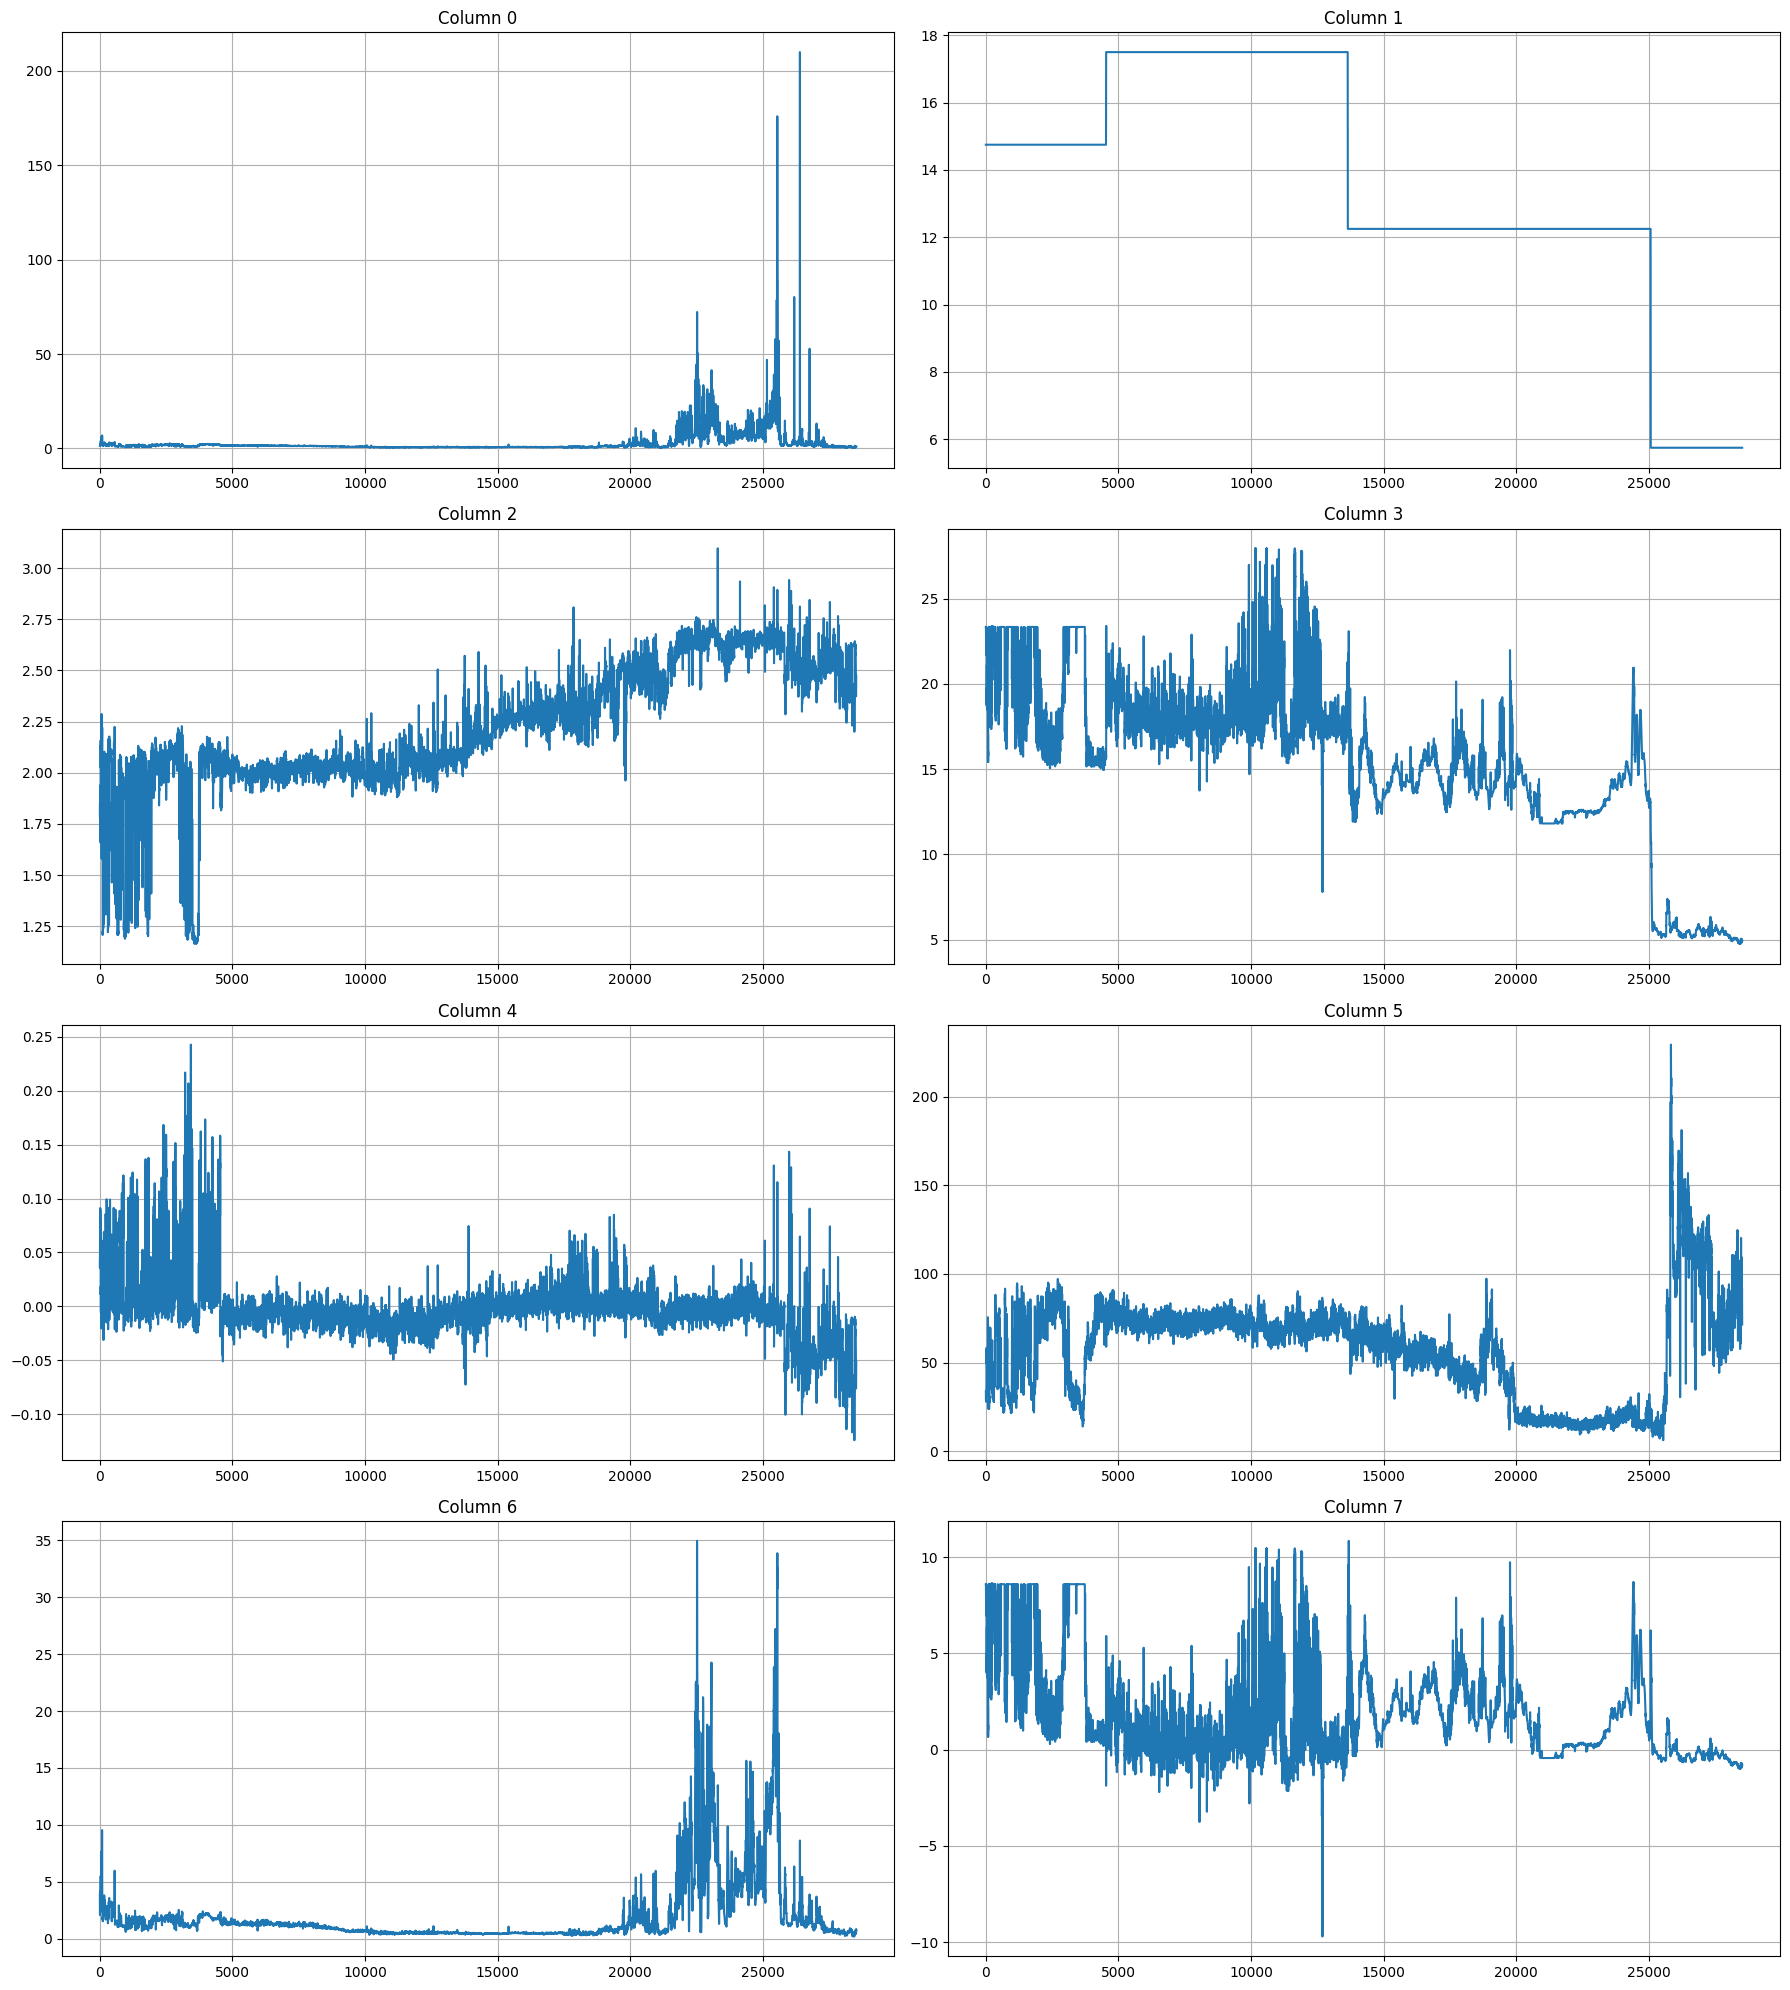

In [33]:
# Plot each column individually
num_cols = X.shape[1]
rows = int(np.ceil(num_cols / 2))

plt.figure(figsize=(18, 5 * rows))
for i in range(num_cols):
    plt.subplot(rows, 2, i+1)
    plt.plot(X[:, i])
    plt.title(f"Column {i}")
    plt.grid(True)
plt.tight_layout()
plt.show()

PCA completed with shape: (28524, 2)


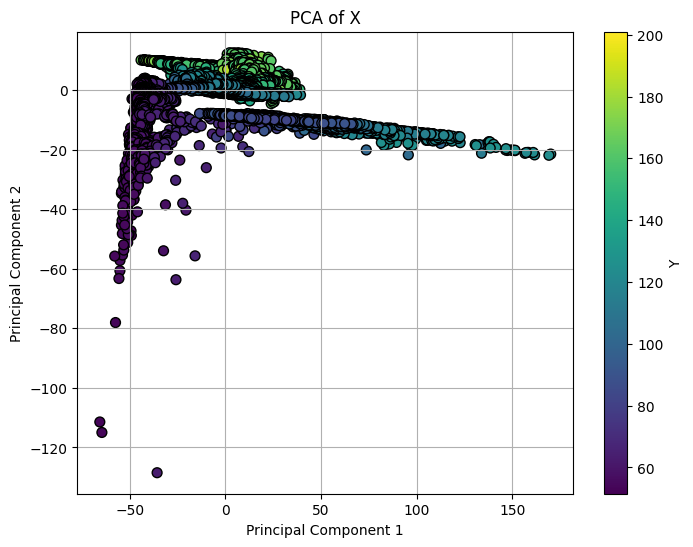

In [35]:
#conduct PCA on X   
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(f"PCA completed with shape: {X_pca.shape}")
# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of X')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Y')
plt.grid(True)
plt.show()

Mean Squared Error: 145.2882862375861
R^2 Score: 0.899858042118839


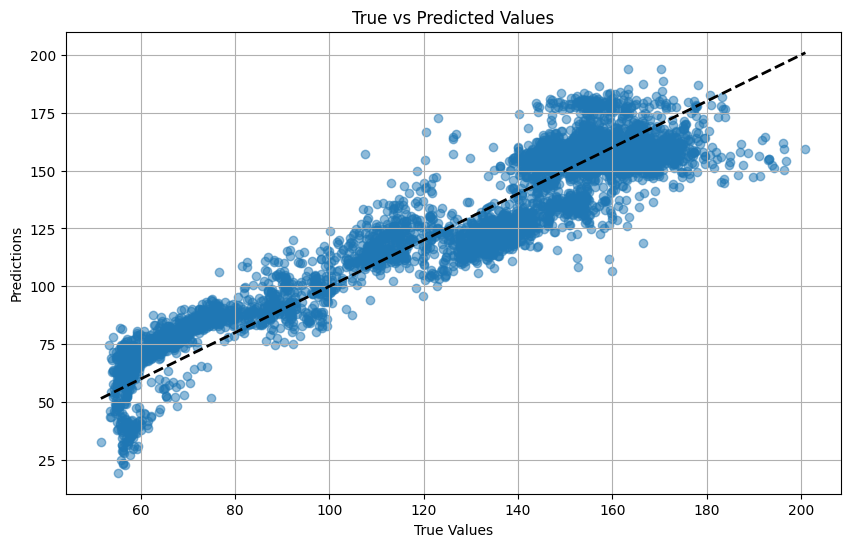

In [34]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Train a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
# Plot the predictions against the true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.grid(True)
plt.show()